# **DIDA 340 Final Project: Using a Siamese Network for Signature Recognition**
### **Group Members: Malayka Mudassar, Asia Qin, Daniel Ruiz & Andria Zheng**



---



# **Introduction:**

### **Background and Literature Review:**
As we shift to a more digital world, the risk of biometric identity theft for malicious purposes increases. Additionally, in matters like identity verification, challenges in signature matching can lead to significant problems. For example,[ during the 2020 election](https://https://www.cnn.com/2020/09/14/politics/election-2020-ballot-signature-mismatches/index.html), all ballots were mailed in, and election officials visually compared signatures on the ballots to those on file to assess their validity. This process led to many ballots being thrown out altogether, and it also disproportionately affected minority voters. It leads us to question how the human eye could possibly discern little differences in handwriting. In fact, [an academic article](https://cedar.buffalo.edu/~srihari/papers/JFS-2002.pdf) even cites the intricate factors that make up a unique handwriting, including writing movement, stroke formation, slant, etc. [More recently](https://https://www.biometricupdate.com/202306/notarize-launches-proof-to-bind-digital-signatures-to-id-with-persona-biometrics), different companies, including Notarize, an online real estate service provider, have begun introducing new digital signature platforms that bind identity through ID documentation and selfie biometrics. By streamlining the signature recognition process, companies like Notarize are also demonstrating how it will only become more important in the years to come. Given these developments, it becomes all-the-more urgent to have a standardized and proven machine learning method to correctly identify and distinguish signatures.


### **Motivation and Questions:**
 The **motivation** behind this particular topic is that it is important to determine whether or not two images of a signature belong to the same person. This concept of associating signatures to the proper individual is vital as signatures are what show the consent of an individual in official documentation such as passports, bank transactions, bills, and the authenticity of the signature that will allow these exchanges to occur–revealing sensitive information in the process.


The **questions** that surround this dataset are:
1. Does the dataset account for natural variations in an individual’s own signature and, if not, how can this be done?
2. Does having open access to this dataset pose a risk for forgery and identity theft?
3. How can this dataset be best split in training and validation sets?




---



# Data:

### **Description of Dataset:**
The dataset contains signatures (both original and forged) of thirty individuals. Each individual (labeled through numbers) has five original signatures and five forged signatures associated with them.

### **Data Cleaning:**

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from fastai.vision.all import *
from fastai.data.external import untar_data,URLs
from fastai.data.transforms import get_image_files

In [ ]:
%env KAGGLE_USERNAME="andriazhe"
%env KAGGLE_KEY="f5a185b81977670ea353ac375a1bf820"

!kaggle datasets download -d divyanshrai/handwritten-signatures
!unzip handwritten-signatures

env: KAGGLE_USERNAME="andriazhe"
env: KAGGLE_KEY="f5a185b81977670ea353ac375a1bf820"
Dataset URL: https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures
License(s): unknown
 99% 367M/370M [00:20<00:00, 17.0MB/s]
100% 370M/370M [00:20<00:00, 19.2MB/s]
Archive:  handwritten-signatures.zip
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100002.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100003.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100004.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100005.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100006.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100007.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100008.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100009.png  
  inflating: Dataset_Signa

In [ ]:
# File containing both forged and real signatures
path = Path("sample_Signature/sample_Signature")
files = get_image_files(path)
files[0]

Path('sample_Signature/sample_Signature/genuine/NFI-03005030.PNG')

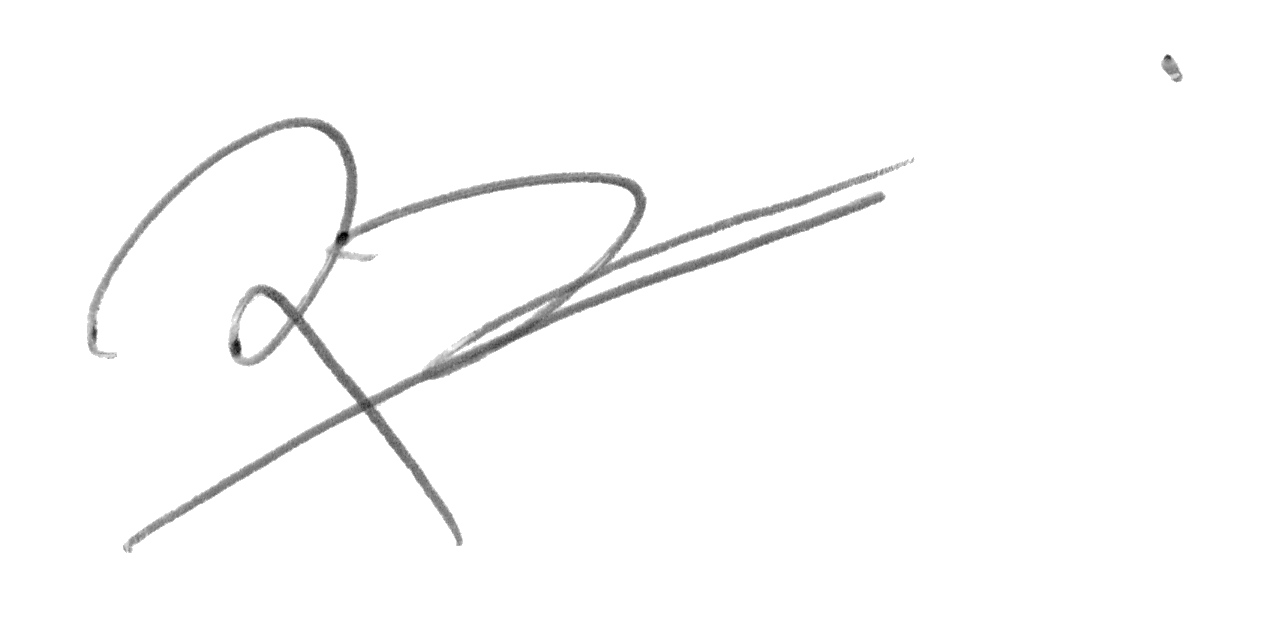

In [ ]:
import PIL
img = PIL.Image.open(files[0])
img



---



# Analysis:

### **Challenge Taken and Work Done:**

For our analysis, we used the siamese network architecture since it is well-suited for comparing pairs of inputs and figuring out how similar they are. For the inputs, we used signatures (either a genuine pair or forged pair) from the dataset. Since a siamese network learns a similarity function between these two inputs, embeddings will then be generated after extracting features, such as slant and other stroke characteristics, from inputs. Then, a similarity metric (typically euclidean distance) is  used to compare the embeddings, and the model is trained using a loss function to minimize the distance for similar pairs of signatures.

In order to help the model learn better, transformations were implemented into the dataloaders to optimize signature recognition. With a learning rate of 0.001, the model went through three iterations, increasing the accuracy through each version. The first iteration did not contain any modifications, and the accuracy would come to around 50%, which was similar to our null accuracy. Before the second iteration, the brightness would be increased by 20% and contrast by 30% which increased the overall accuracy to ~60%. Ultimately, after the third iteration supplemented by two modifiers and another rotation transformation by a variation of up to 30 degrees, the final accuracy was ~66%.

In [ ]:
import torch
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

In [ ]:
 # Image pixel transformations
def open_image(fname, size=224):
    img = PIL.Image.open(fname).convert('RGB')
    img = img.resize((size, size))
    t = torch.Tensor(np.array(img))
    return t.permute(2,0,1).float()/255.0


In [ ]:
open_image(files[0]).shape

torch.Size([3, 224, 224])

In [ ]:
import re

In [ ]:
def label_func(im_path): # Label based on what the image parent is for batch
    if im_path.parent.name == "forged":
      return "forged"
    elif im_path.parent.name == "genuine":
      return "genuine"
    else:
      return "null"

label_func(files[0])

'genuine'

In [ ]:
labels = list(set(files.map(label_func))) # apply label func to all images
len(labels)

2

In [ ]:
lbl2files = {l: [f for f in files if label_func(f) == l] for l in labels}
lbl2files

{'forged': [Path('sample_Signature/sample_Signature/forged/NFI-01301017.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-02306008.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-01203021.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00303009.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-08802004.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00403007.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00103019.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00105025.PNG'),
  Path('sample_Signature/sample_Signature/forged/NFI-00403013.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00404007.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00404003.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00305018.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-00101019.png'),
  Path('sample_Signature/sample_Signature/forged/NFI-01302017.png'),
  Path('sample_Signature

In [ ]:
import random

In [ ]:
from fastai.data.core import DataLoaders

In [ ]:
class SiameseImage(fastuple): # Takes "pair" of images as an arg, just for displaying pairs
    def show(self, ctx=None, **kwargs):
        if len(self) > 2:
            img1,img2,similarity = self
        else:
            img1,img2 = self
            similarity = 'Undetermined'
        if not isinstance(img1, Tensor): # If img1 not already a tensor
            if img2.size != img1.size: img2 = img2.resize(img1.size) # Resize to be the same
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10) # Line added so they can be separated/displayed side by side
        return show_image(torch.cat([t1,line,t2], dim=2), title=similarity, ctx=ctx, **kwargs)

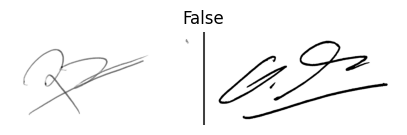

In [ ]:
img = PILImage.create(files[0])
img1 = PILImage.create(files[1])
s = SiameseImage(img, img1, False)
s.show();

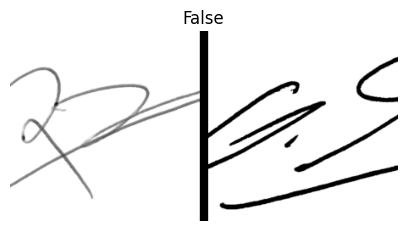

In [ ]:
tst = Resize(224)(s)
tst = ToTensor()(tst)
tst.show();

In [ ]:
class SiameseTransform(Transform): # creates pairs and assigns similarity labels, using SiameseImage as a helper function
    def __init__(self, files, splits):
        self.splbl2files = [{l: [f for f in files[splits[i]] if label_func(f) == l] for l in labels}  # label mapping and splitting
                          for i in range(2)]
        self.valid = {f: self._draw(f,1) for f in files[splits[1]]}
    def encodes(self, f):
        f2,same = self.valid.get(f, self._draw(f,0))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, same)  # label with similarity label

    def _draw(self, f, split=0): # generates image pair
        same = random.random() < 0.5
        cls = label_func(f)
        if not same: cls = random.choice(L(l for l in labels if l != cls))
        return random.choice(self.splbl2files[split][cls]),same

In [ ]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, splits)

In [ ]:
valids = [v[0] for k,v in tfm.valid.items()]  #assert no overlap between training & validation set
assert not [v for v in valids if v in files[splits[0]]]

In [ ]:
tls = TfmdLists(files, tfm, splits=splits)

<Axes: title={'center': 'True'}>

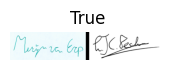

In [ ]:
show_at(tls.valid, 0)

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [ ]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats),
                       Brightness(max_lighting=0.2), Contrast(max_lighting=0.3),Rotate(max_deg=35)] )



In [ ]:
def null_accuracy(dls, always_same=True):
    correct = 0
    total = 0

    for batch in dls.train:
        img1, img2, similarity = batch # unpacking SiameseImage

        predictions = torch.ones_like(similarity) if always_same else torch.zeros_like(similarity) # predict same (1) or diff (0)

        correct += (predictions == similarity).sum().item()
        total += len(similarity)

    return correct / total

In [ ]:
@typedispatch
def show_batch(x:SiameseImage, y, samples, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n), nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs): SiameseImage(x[0][i], x[1][i], ['Not similar','Similar'][x[2][i].item()]).show(ctx=ctx)  # show n number of SiameseTransform func pairs

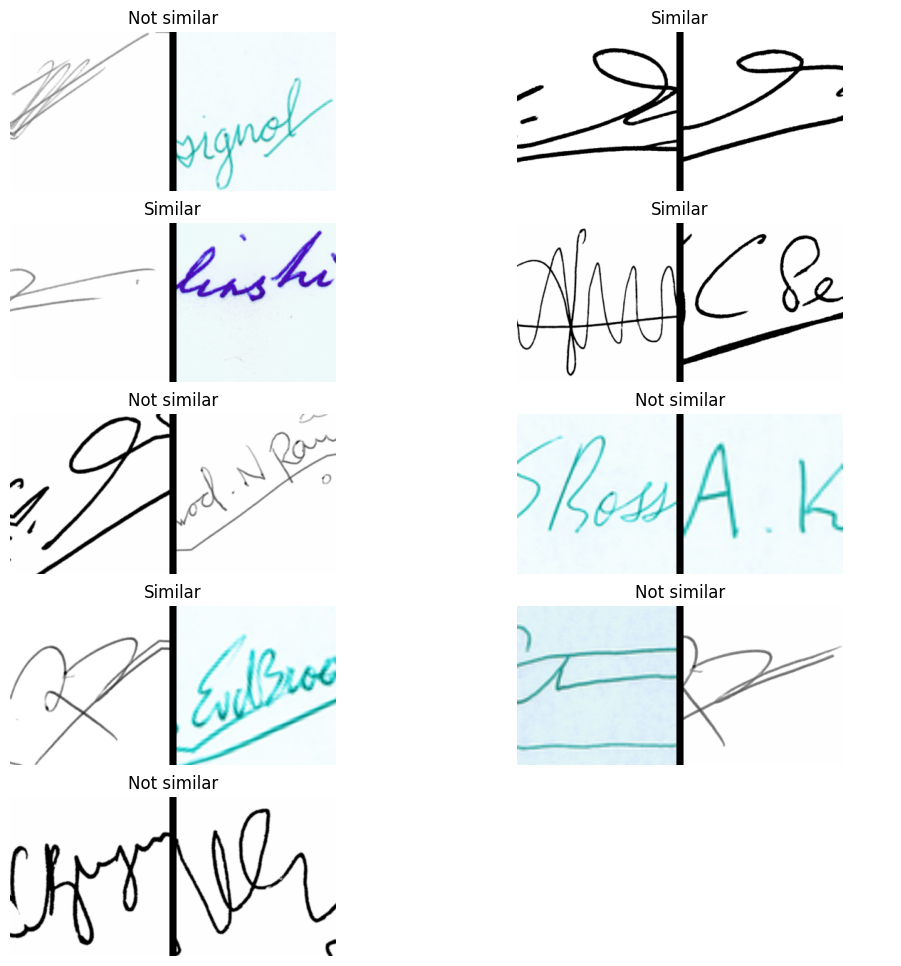

In [ ]:
dls.show_batch()

In [ ]:
null_acc_same = null_accuracy(dls, always_same=True) # null accuracy is pretty far from trained model estimates

null_acc_diff = null_accuracy(dls, always_same=False)

print(f"Null accuracy for always same): {null_acc_same:.4f}")
print(f"Null accuracy for always different): {null_acc_diff:.4f}")

Null accuracy for always same): 0.5260
Null accuracy for always different): 0.4479


In [ ]:
class SiameseModel(Module):
    def __init__(self, encoder, head):
        self.encoder,self.head = encoder,head # feature extractor & predictor

    def forward(self, x1, x2):
        ftrs = torch.cat([self.encoder(x1), self.encoder(x2)], dim=1) # feature vectors are compared and given a similarity score (head)
        return self.head(ftrs)

In [ ]:
encoder = create_body(resnet34(), cut=-2) # layers of NN except for last 2 are used (bc the last 2 are for classification)

In [ ]:
head = create_head(512*2, 2, ps=0.5)
model = SiameseModel(encoder, head)

In [ ]:
def siamese_splitter(model):
    return [params(model.encoder), params(model.head)]

In [ ]:
def loss_func(out, targ): # calculates cross entropy loss between predicted and true
    return CrossEntropyLossFlat()(out, targ.long())

In [ ]:
class SiameseTransform(Transform):
    def __init__(self, files, splits):
        self.splbl2files = [{l: [f for f in files[splits[i]] if label_func(f) == l] for l in labels}
                          for i in range(2)]
        self.valid = {f: self._draw(f,1) for f in files[splits[1]]}
    def encodes(self, f):
        f2,same = self.valid.get(f, self._draw(f,0))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, int(same))

    def _draw(self, f, split=0):
        same = random.random() < 0.5
        cls = label_func(f)
        if not same: cls = random.choice(L(l for l in labels if l != cls))
        return random.choice(self.splbl2files[split][cls]),same

In [ ]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, splits)
tls = TfmdLists(files, tfm, splits=splits)
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats),
                       Brightness(max_lighting=0.2), Contrast(max_lighting=0.3),Rotate(max_deg=35)] )

In [ ]:
valids = [v[0] for k,v in tfm.valid.items()]
assert not [v for v in valids if v in files[splits[0]]]

### **Comparison with Literature:**


A study conducted by [Solapur University](https://www.researchgate.net/publication/340388072_Verification_of_genuine_and_forged_offline_signatures_using_Siamese_Neural_Network_SNN) explored the application of a Siamese Neural Network for the task of signature recognition. The researchers tested their approach on a dataset that is comparable to the one we used and reported an accuracy of 77.48%. It is important to note that, in their methodology, they performed statistical transformations on their dataset during the preprocessing stage to improve accuracy. Additionally, they enhanced their results by combining the Siamese Network with a Convolutional Neural Network (CNN) to boost performance further. These extra steps likely contributed significantly to their reported accuracy. When taking into account the advanced techniques they utilized, along with the limited time frame and resources we had available for this project, our model’s performance (66.6%) is fairly decent and demonstrates reasonable results in comparison.

### **Model Accuracy and Evaluation Assessment:**


In [ ]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=siamese_splitter, metrics=accuracy)

In [ ]:
learn.freeze()

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0002290867705596611)

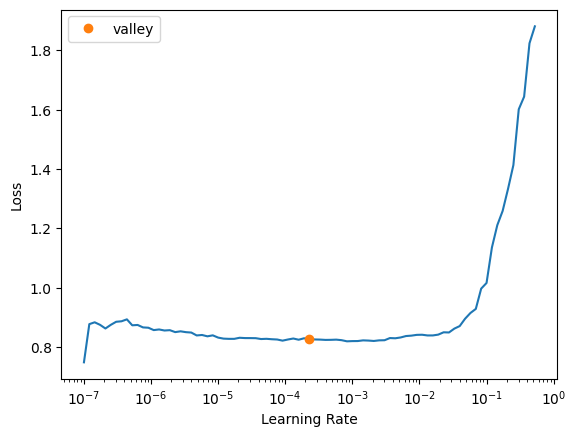

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, (0.001))

epoch,train_loss,valid_loss,accuracy,time
0,0.807747,0.722635,0.416667,00:09
1,0.817467,0.702793,0.366667,00:09
2,0.808797,0.675532,0.600000,00:09
3,0.804001,0.684306,0.550000,00:10
4,0.801906,0.694726,0.566667,00:09
5,0.797894,0.717628,0.466667,00:08
6,0.802114,0.700298,0.500000,00:11
7,0.799649,0.714389,0.483333,00:10
8,0.795411,0.703748,0.366667,00:07
9,0.786585,0.698001,0.416667,00:10


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, slice(0.001))

epoch,train_loss,valid_loss,accuracy,time
0,0.762389,0.771964,0.400000,00:10
1,0.750157,0.807185,0.483333,00:11
2,0.763420,0.808720,0.550000,00:08
3,0.769136,0.769671,0.650000,00:11
4,0.783949,1.121676,0.400000,00:09
5,0.779721,0.840586,0.400000,00:09
6,0.775481,0.722056,0.483333,00:09
7,0.774330,0.698425,0.566667,00:12
8,0.771284,0.696421,0.550000,00:09
9,0.774881,0.689479,0.566667,00:08


In [ ]:
@typedispatch #Equivalent of a confusion matrix
def show_results(x:SiameseImage, y, samples, outs, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n), nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs):
        title = f'Actual: {["Not similar","Similar"][x[2][i].item()]} \n Prediction: {["Not similar","Similar"][y[2][i].item()]}'
        SiameseImage(x[0][i], x[1][i], title).show(ctx=ctx)

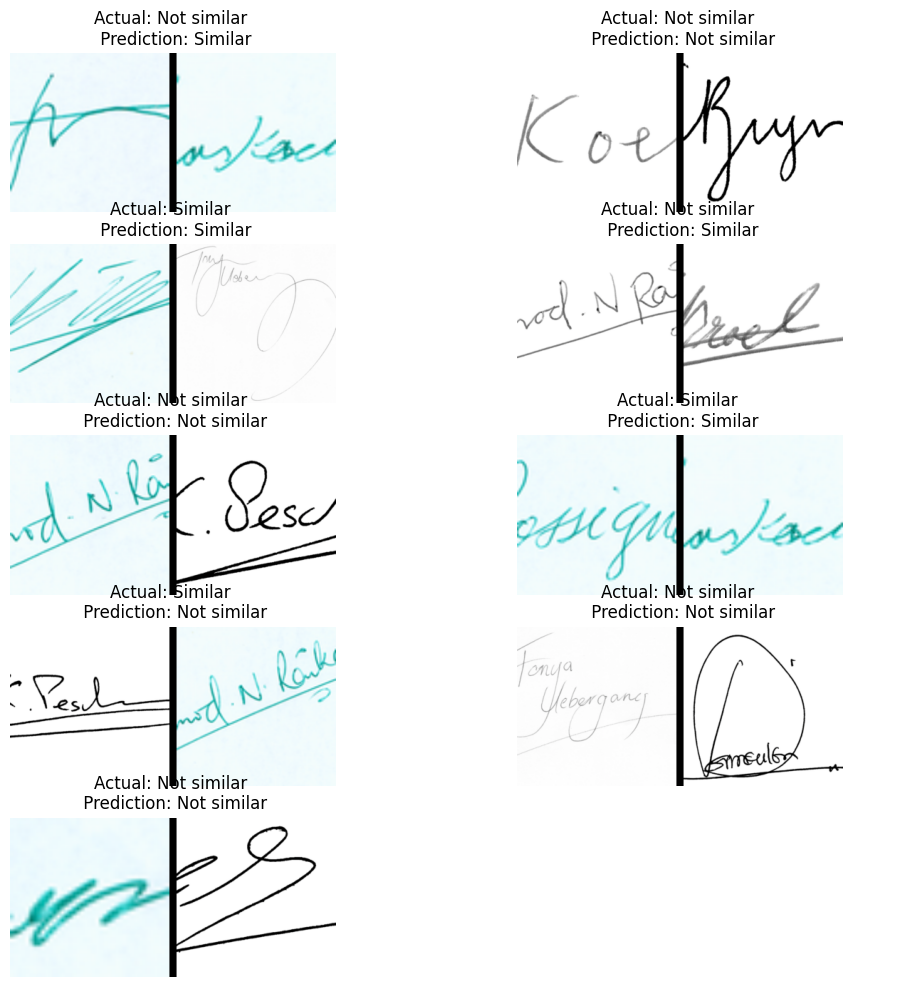

In [ ]:
learn.show_results()

# **Conclusion and Summary:**
After making the necessary image modifications, the final average accuracy rate after running 10 epochs of our model was 66.666%. During one of our test runs, we managed to hit a peak accuracy rate of appoximately 69%. These results highlight the nuances behind automating signature similarity analysis, as the extraction of intricate and minute features generally remains a significant hurdle for machine learning models to overcome.

Overall, our project emphasizes the inherent limitations of the human eye when it comes to distinguishing forged signatures from genuine ones. At a glance, genuine and forged signature samples from the same individual in our dataset often appeared identical, which makes manual verification difficult and unreliable. Despite the current limitations of deploying siamese networks for signature verification-- as seen in both our implementation and in the literature-- they are sure to improve over time and represent an approach that will slowly but surely become more scalable.

Future work could focus on making image modifications that are more advanced than the scope of this project to improve performance of the model. In addition to this, access to higher-quality signature datasets would assist the model in capturing more intricate details, ultimately leading to a better accuracy. With continued development, signature verification using machine learning techniques will become an increasingly used tool in security systems across different fields.



---

